<a href="https://colab.research.google.com/github/wcrowley342/DataCamp_CustomerChurn/blob/main/DataCamp_Marketing_Analytics_%26_Customer_Churn_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://campus.datacamp.com/courses/marketing-analytics-predicting-customer-churn-in-python/exploratory-data-analysis-d47601e1-b531-46a8-84a6-089ff0c2ccec?ex=1

# Exploratory Data Analysis

**Defining customer churn**

Different types of churn exist (nonvoluntary / voluntary) 

**Dataset** 

https://assets.datacamp.com/production/repositories/1764/datasets/79c5446a4a753e728e32b4a67138344847b8f131/Churn.csv

in the course consists of telephone customers, including


*   Usage
*   Cost for service
*   Customer usage
*   Customer Churn? (Y/N)

Churn is defined by a customer cancelling their cellular plan at a given point in time


Use some standard EDA Pandas methods to review data:

dataset.info()

Use the value_counts methods to see how many have churned, via the binary 'Churn' column

dataset['Churn'].value_counts()


In [2]:
#import pandas 

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

#import data

telco = pd.read_csv('https://assets.datacamp.com/production/repositories/1764/datasets/79c5446a4a753e728e32b4a67138344847b8f131/Churn.csv')

In [3]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [3]:
telco.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [4]:
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [ ]:
telco['Churn'].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

**Grouping and Summarizing data**

lets look at the data to understand differences between churners and non-churners, and ask questions like:

*   Do churners call customer service more often?
*   Does one state have more churners compared to another?



In [ ]:
print(telco.groupby(['Churn']).mean())

       Account_Length  Vmail_Message  ...  Intl_Charge   Area_Code
Churn                                 ...                         
no         100.793684       8.604561  ...     2.743404  437.074737
yes        102.664596       5.115942  ...     2.889545  437.817805

[2 rows x 16 columns]


based on the data above, we can see that churners leave fewer voice mails, etc etc

In [ ]:
#group by state 
#need to group by 'x'/state, and then aggregate by 'y'/churn

print(telco.groupby('State')['Churn'].value_counts())

State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
                ..
WI     yes       7
WV     no       96
       yes      10
WY     no       68
       yes       9
Name: Churn, Length: 102, dtype: int64


**Exploring data using visualizations**

In [5]:
import seaborn as sns

We typically assume normal distributions of variables, but histograms help to show distributions of variables 

<function matplotlib.pyplot.show>

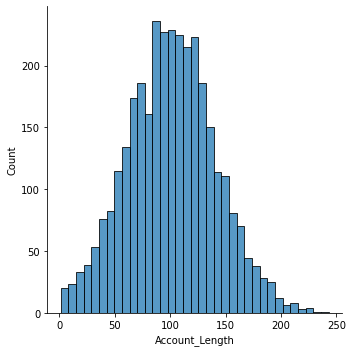

In [6]:
sns.displot(telco['Account_Length'])
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


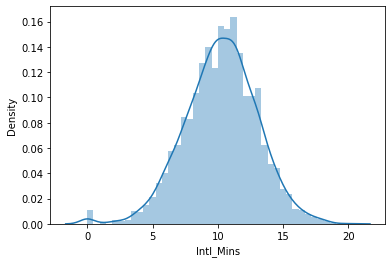

In [7]:
sns.distplot(telco['Intl_Mins'])

Differences in churners vs non churners can be visualized via box plots...

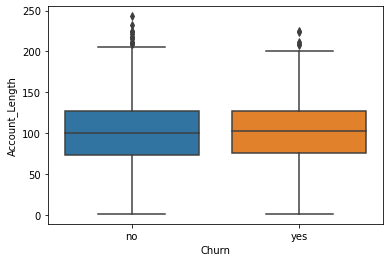

In [ ]:
sns.boxplot(x = 'Churn', y = 'Account_Length', data = telco)

no noticable different in account length

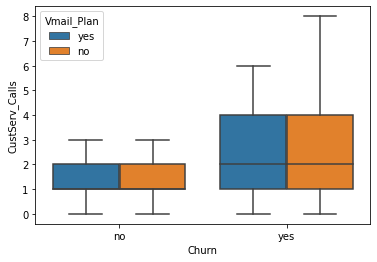

In [ ]:
#sym = "" removes outliers
#hue adds a third variable to analyze

sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "",
            hue = "Vmail_Plan")

# Data Preprocessing for Churn Modeling 

Some assumptions made by models

*   Data is normally distributed
*   Data is on same scale




In [8]:
telco.dtypes

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn              object
Intl_Plan          object
Vmail_Plan         object
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
dtype: object

columns that have text are usually encoded as objects

In [ ]:
telco['Intl_Plan'].head

<bound method NDFrame.head of 0        no
1        no
2        no
3       yes
4       yes
       ... 
3328     no
3329     no
3330     no
3331    yes
3332     no
Name: Intl_Plan, Length: 3333, dtype: object>

In [9]:
#encoding binary features into numeric data

telco['Intl_Plan'].replace({'no':0 , 'yes':1})

telco['Intl_Plan'].head()

0     no
1     no
2     no
3    yes
4    yes
Name: Intl_Plan, dtype: object

can use dummy variables / one hot encoding to preprocess columns like state PA (so as not to give them order/value via numbers)

In [ ]:
# Perform one hot encoding on 'State'
telco_state = pd.get_dummies(telco['State'])

**Feature Scaling**

Standardization - centers the distribution around the mean, calculates the number of stadard deviations way from the mean each point is

In [ ]:
from sklearn.preprocessing import StandardScaler

telco_scaled = StandardScaler().fit_transform(telco)


# Add column names back for readability
telco_scaled_df = pd.DataFrame(telco_scaled, columns=["Intl_Calls", "Night_Mins"])

# Print summary statistics
print(telco_scaled_df.describe())


ValueError: ignored

**Feature Selection and Engineering**

Consider dropping unnecessary features like unique identifiers (phone numbers, SSN, etc) via the .drop method

In [12]:
telco.drop(['Phone'], axis=1)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70,KS,415
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70,OH,415
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78,OH,408
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73,OK,415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,215.5,279.1,9.9,2,no,no,yes,77,26.55,126,18.32,83,12.56,6,2.67,AZ,415
3329,68,0,231.1,153.4,191.3,9.6,3,no,no,no,57,39.29,55,13.04,123,8.61,4,2.59,WV,415
3330,28,0,180.8,288.8,191.9,14.1,2,no,no,no,109,30.74,58,24.55,91,8.64,6,3.81,RI,510
3331,184,0,213.8,159.6,139.2,5.0,2,no,yes,no,105,36.35,84,13.57,137,6.26,10,1.35,CT,510


Also drop highly coorelated features (they provide no additional info) 

In [13]:
telco.corr()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Account_Length,1.000000,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546,-0.012463
Vmail_Message,-0.004628,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884,-0.001994
Day_Mins,0.006216,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092,-0.008264
Eve_Mins,-0.006757,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067,0.003580
Night_Mins,-0.008955,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180,-0.005825
Intl_Mins,0.009514,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993,-0.018288
CustServ_Calls,-0.003796,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675,0.027572
Day_Calls,0.038470,-0.009548,0.006750,-0.021451,0.022938,0.021565,-0.018942,1.000000,0.006753,0.006462,-0.021449,-0.019557,0.022927,0.004574,0.021666,-0.009646
Day_Charge,0.006214,0.000776,1.000000,0.007050,0.004324,-0.010157,-0.013427,0.006753,1.000000,0.015769,0.007036,0.022972,0.004301,0.008032,-0.010094,-0.008264
Eve_Calls,0.019260,-0.005864,0.015769,-0.011430,-0.002093,0.008703,0.002423,0.006462,0.015769,1.000000,-0.011423,0.007710,-0.002056,0.017434,0.008674,-0.011886


variables that stand out (due to high correlation) include, Day_Charge, Eve_Charge, Night_Charge, Intl_Charge

In [19]:
telco = telco.drop(['Day_Charge','Phone'], axis=1)
print(telco.columns)

KeyError: ignored

**Feature Engineering** - creating new features to help improve model performance

critial step, often informed by consultation and business insight 

Examples include


*   Combining day min and night min for total min
*   Creating ratios between minutes and charge



In [16]:
telco['Day_Ratio'] = telco['Day_Charge'] / telco['Day_Calls']

# Churn Prediction

**Making Predictions** (supervised machine learning in python using sckit-learn)



**Model Selection**

for classification problems, logistic regression is a good baseline
offers simplicity and interpretability 

Can also play around with random forest or SVM

**Training your model**

In [4]:
from sklearn.svm import SVC

In [5]:
#instatiate the classifier 

svc = SVC()

In [10]:
#fit the classifier 
#2 variables, features and target varaible

svc.fit(telco[features], teclo['target'])

NameError: ignored

**Making a prediction**

In [ ]:
#prediction = svc.predict(new_customer)

#print(prediction)

**Evaluating Model Performance**

**Accuracy**: total number of correct predictions / total number of data points 


**Training & test sets**

*   Fit your classifier to the training set
*   Make predictions using the test set

helps to showcase/prove out how generalizable your model is

usually good to do an 80 (training) / 20 (test) split


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#create feature variable

x = telco.drop('Churn', axis=1)

#create target variable 

y = telco['Churn']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(telco['data'], telco['target'], test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.svm import SVC

svc = SVC()

#fitting the model on the testing/training 

svc.fit(x_train, y_train)

svc.predict(x_test)

In [ ]:
#computing accuracy on the testing data

svc.score(x_test, y_test)

In [ ]:
#GOOD EXAMPLE

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

#create feature variable
x = telco.drop('Churn', axis=1)

#create target variable 
y = telco['Churn']

#create training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit to the training data
clf.fit(X_train, y_train)

#making prediction

prediction = clf.predict(new_customer)
#print(prediction)

# Compute accuracy
clf.score(X_train, y_train)
print(clf.score(X_test, y_test))